# <b> Exploratory Data Analysis on Red Wine Dataset </b>

The goal of the project is to:
- Explore the distribution of the our data
- Explore the relationship between each physicochemical property with the quality 
- Dig any other interesting relationship with the data that might be relevant to any future analysis

## <b> Data Preparation </b>

The dataset is obtained through UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [50]:
#Loading all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
#Loading our data
data = pd.read_csv("winequality-red.csv", low_memory=False, sep=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
#Checking for any null value 
null_col = np.sum(data.isnull())
null_col

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
#Looking at the unique value of our dependent variable that are available on the dataset
target= data["quality"]
print(np.unique(target))

[3 4 5 6 7 8]


## <b> Data Summary </b>

In [22]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


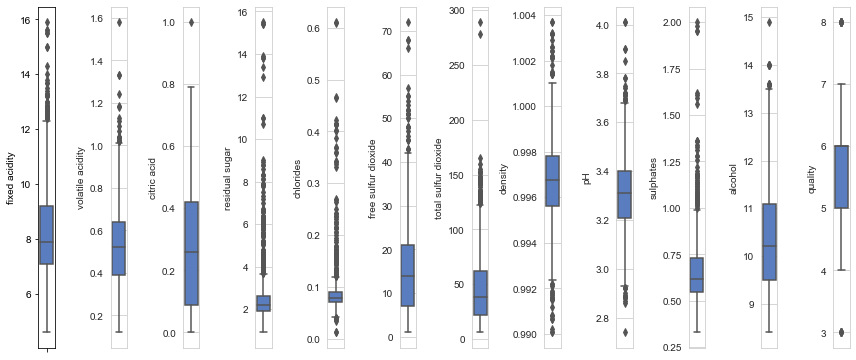

In [54]:
col_val = data.columns.values
col_num=12
row_num = len(col_val)-1/col_num
plt.figure(figsize=(col_num,5*row_num))
for i in range(0,len(col_val)):
    plt.subplot(row_num + 1,col_num,i+1)
    sns.set_style("whitegrid")
    sns.boxplot(data[col_val[i]],palette="muted",orient="v")
    plt.tight_layout()

## <b> Distribution </b>

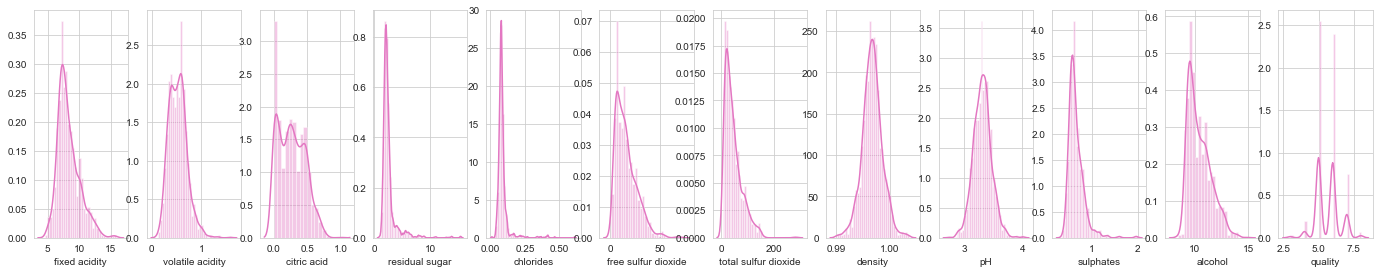

In [58]:
#Looking at our distribution 
plt.figure(figsize=(2*col_num,5*row_num))
for i in range(0,len(col_val)):
    plt.subplot(row_num + 1,col_num,i+1)
    sns.distplot(data[col_val[i]],kde=True, color= "tab:pink")

## <b> Correlation Between Variables </b>

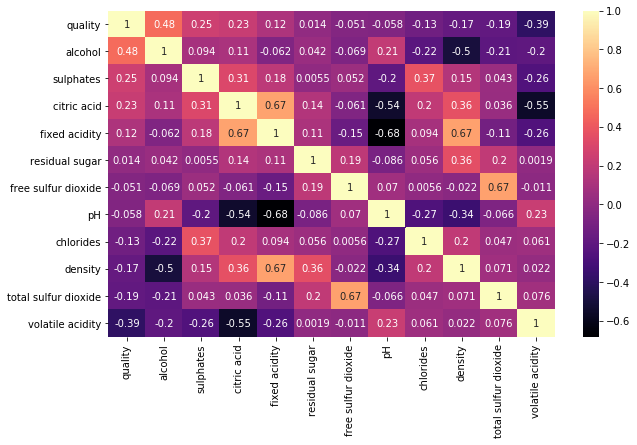

In [22]:
#Looking at how our independent variables correlate with our dataset
variables = 12 
column = data.corr().nlargest(variables, "quality")["quality"].index
conrrelation_matrix = data[column].corr()
plt.figure(figsize=(10,6))
sns.heatmap(conrrelation_matrix, annot=True, cmap = "magma")

## <b> Exploring Types of Acid and pH </b>

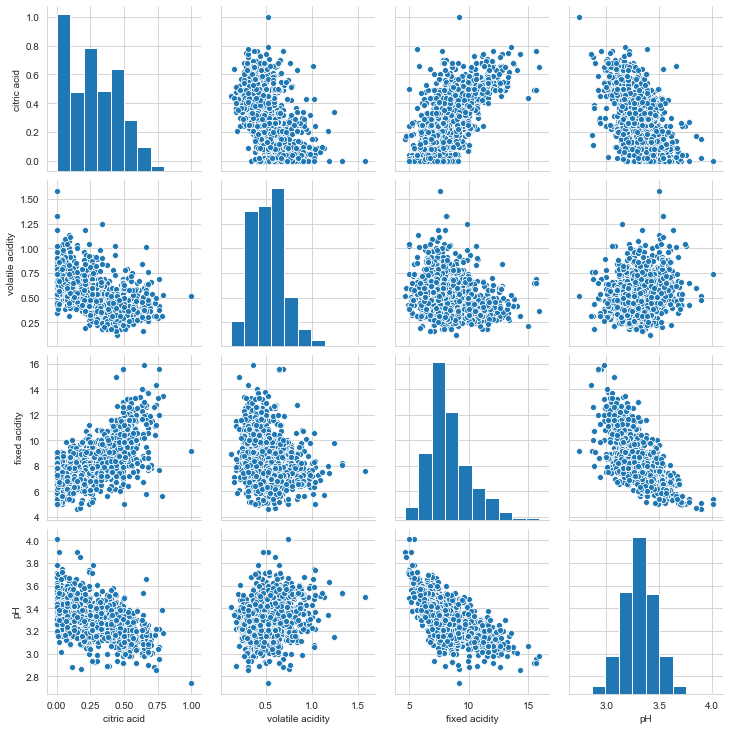

In [62]:
ph_acid= data[["citric acid", "volatile acidity", "fixed acidity", "pH"]]
sns.pairplot(ph_acid)

In [63]:
acid_data= data[["citric acid", "volatile acidity", "fixed acidity"]]
pH= data["pH"]
scaler = StandardScaler()
scaled_df= scaler.fit_transform(acid_data)
scaled_acid= pd.DataFrame(scaled_df, columns= acid_data.columns)

,citric acid,volatile acidity,fixed acidity
count,1.599000e+03,1.599000e+03,1.599000e+03
mean,4.335355e-16,1.699704e-16,3.435512e-16
std,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.391472e+00,-2.278280e+00,-2.137045e+00
25%,-9.293181e-01,-7.699311e-01,-7.007187e-01
50%,-5.636026e-02,-4.368911e-02,-2.410944e-01
75%,7.652471e-01,6.266881e-01,5.057952e-01
max,3.743574e+00,5.877976e+00,4.355149e+00


In [67]:
new_acid_ph= pd.concat([scaled_acid, pH], axis=1)
new_acid_ph.describe()

,citric acid,volatile acidity,fixed acidity,pH
count,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000
mean,4.335355e-16,1.699704e-16,3.435512e-16,3.311113
std,1.000313e+00,1.000313e+00,1.000313e+00,0.154386
min,-1.391472e+00,-2.278280e+00,-2.137045e+00,2.740000
25%,-9.293181e-01,-7.699311e-01,-7.007187e-01,3.210000
50%,-5.636026e-02,-4.368911e-02,-2.410944e-01,3.310000
75%,7.652471e-01,6.266881e-01,5.057952e-01,3.400000
max,3.743574e+00,5.877976e+00,4.355149e+00,4.010000


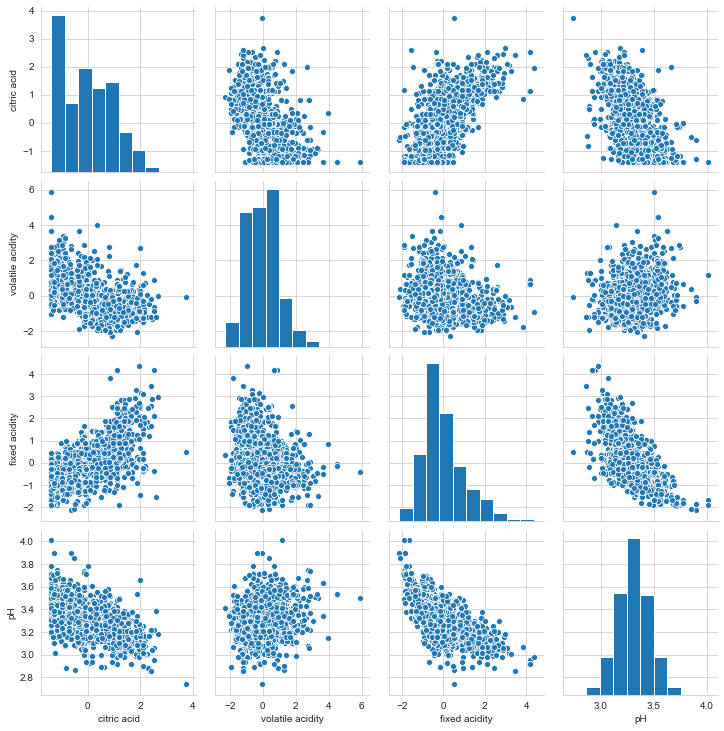

In [68]:
sns.pairplot(new_acid_ph)